# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

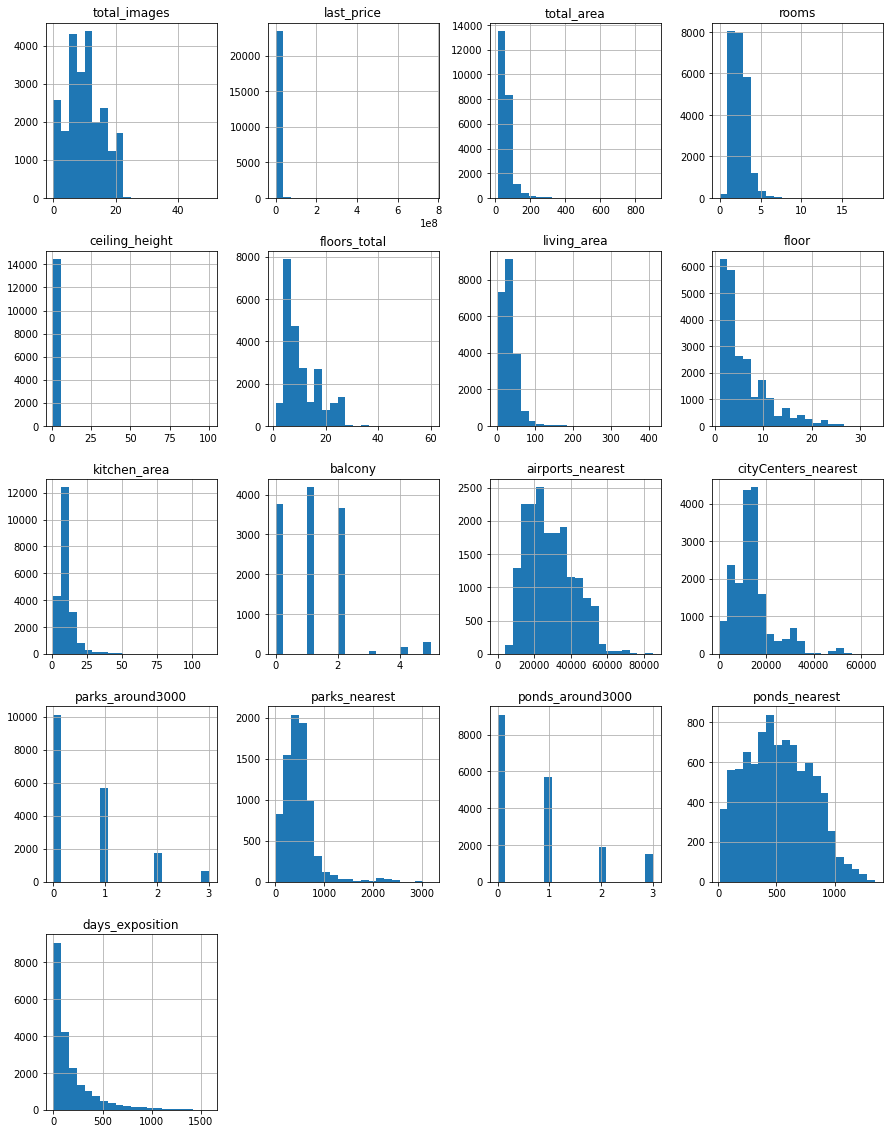

In [3]:
data.hist(bins = 20, figsize=(15, 20));

Вывод:
Уже из нескольких строк датасета видно, что в данные требуют предобработки. Есть много пропусков, явные и неявные дубликаты.
Метод *info()* показал, что некоторые столбцы сохранены в формате, неудобном для работы с данными.
По гистограммам видно, что в некоторых столбцах есть аномальные значения.

### Предобработка данных

#### Обработаем пропуски

##### Найдём столбцы, в которых есть пропуски:

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Изучим информацию о данных в датафрейме с помощью метода *describe()*. Таким образом мы сможем оценить, какие значения встречаются чаще всего, и предположить, как можно заполнить пропуски.

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


##### Заполним пропуски там, где это возможно.

Количество балконов. Вероятно, в тех объявлениях, где пропущено это значение, балкон в квартире отсутствует. Заменим пропуски на 0. Так же поступим со столбцами "апартаменты","число водоёмов в радиусе 3 км" и "число парков в радиусе 3 км".

In [6]:
data[['balcony', 'is_apartment', 'ponds_around3000', 'parks_around3000', ]]\
= data[['balcony','is_apartment', 'ponds_around3000', 'parks_around3000']].fillna(0)

По следующим столбцам заменим пропуски нижеперечисленными способами:

In [7]:
#высота потолков скорее всего не зависит от тех данных, которые имеются в датафрейме.
#Но количество пропусков в этом столбце не слишком велико, также как и отклонение. 
#Поэтому для заполнения пропусков используем медиану.
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [8]:
#пропуски в жилой площади рассчитаем с помощью среднего соотношения жилой площади к общей площади
data['living_area'] = data['living_area'].fillna(data['total_area']*(data['living_area'].sum()/data['total_area'].sum()))
#также поступим с площадью кухни
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*(data['kitchen_area'].sum()/data['total_area'].sum()))

In [9]:
data['parks_nearest'].isna().sum()

15620

In [10]:
#расстояние до ближайшего парка рассчитаем как медианную по имеющимся данным по населенным пунктам.
#так же поступим с расстоянием до аэропорта и до центра города.
#таким способом мы не сможем заполнить все пропуски, т.к. не по всем срезам можно вычислить медиану.
for name in data['locality_name'].unique():
    data.loc[(data['locality_name'] == name) & (data['parks_nearest'].isna()), 'parks_nearest'] =\
    data.loc[(data['locality_name'] == name) & (data['parks_nearest'] != 'NaN'), 'parks_nearest']\
    .median()
    data.loc[(data['locality_name'] == name) & (data['airports_nearest'].isna()), 'airports_nearest']\
    =data.loc[(data['locality_name'] == name) & (data['airports_nearest'] != 'NaN'),\
    'airports_nearest'].median()
    data.loc[(data['locality_name'] == name) & (data['cityCenters_nearest'].isna()),\
    'cityCenters_nearest'] = data.loc[(data['locality_name'] == name)\
    & (data['cityCenters_nearest']!= 'NaN'), 'cityCenters_nearest'].median()
    
    
#оставшиеся пропуски заполним "заглушками" - "-1".
data[['parks_nearest', 'airports_nearest', 'cityCenters_nearest', 'days_exposition']]\
= data[['parks_nearest', 'airports_nearest', 'cityCenters_nearest', 'days_exposition']].fillna(-1)
#предупреждение ниже появляется из-за того, что не по всем срезам можно найти медиану

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Пропущенные значения в столбцах "всего этажей в доме", "сколько дней было размещено объявление"  и "название населённого пункта" мы предсказать или рассчитать не сможем, поэтому удалим их.

In [11]:
data = data.dropna(subset=['floors_total', 'locality_name'])

Расстояние до ближайшего водоёма не понадобится нам при анализе, поэтому заполним отсутствующие значения "заглушкой" - "-1". Так мы не потеряем большое количество строк с нужными данными, но при этом избавимся от пропусков.

In [12]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)
data = data.reset_index(drop=True)

Проверим пропуски после проделанной работы:

In [13]:
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

##### Возможные причины пропусков

1. Составитель объявления не указал данные, т.к. запрашиваемые данные отсуствуют физически (пример: балкон, пруд, парк). Вместо нуля составитель оставил ячейку пустой.
2. Данные существуют, но составитель объявления решил их скрыть/не знает их (пример: площадь общая и кухни, апартаменты или нет, высота потолков, расстояния до аэропорта, парка, пруда и проч.)
3. Программный сбой при выгрузке данных/при заполнении объявления (пример: название населенного пункта, сколько дней размещено объявление, всего этажей в доме).

#### Приведём данные в столбцах к необходимому типу данных

##### Cтолбцы, в которых нужно изменить тип данных.

Приведём данные столбцы к следующим типам:
- "дата публикации" к datetime;
- "всего этажей в доме" к int;
- "число балконов" к int;
- "число парков в радиусе 3 км" к int;
- "число водоёмов в радиусе 3 км" к int;
- "сколько дней было размещено объявление" к int;
- "апартаменты" к bool.

##### Преобразуем тип данных в выбранных столбцах.

Для этого применим методы *to_datetime()* и *astype()*.

In [14]:
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data[['floors_total', 'balcony', 'days_exposition', 'ponds_around3000', 'parks_around3000']]\
= data[['floors_total', 'balcony', 'days_exposition', 'ponds_around3000', 'parks_around3000']]\
.astype(int)
data['is_apartment'] = data['is_apartment'].astype(bool)

##### Почему нужно было изменить тип данных?

Тип данных определяет не только то, как будет выглядеть информация, но и какие операции с ней можно будет выполнять. Чтобы нам было доступно максимальное количество действий, необходимо привести данные к определенным типам.

#### Устранение неявных дубликатов в названиях населённых пунктов

Изучим уникальные значения в этом столбце

In [15]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Оставим только непосредственно название населенного пункта.

In [16]:
for i in range(len(data['locality_name'])):
    data.loc[i, 'locality_name']=data.loc[i, 'locality_name'].split()[-1]
#проверим
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Бор', 'Гатчина', 'Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'Девяткино', 'Металлострой', 'Лебяжье',
       'Сиверский', 'Молодцово', 'Кузьмоловский', 'Ропша', 'Павловск',
       'Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'Сестрорецк', 'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое',
       'Заклинье', 'Торковичи', 'Первомайское', 'Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Свет', 'Сланцы', 'Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск', 'Оржицы',
       'Кальтино', 'Романовка', 'Бугры', 'Рощино', 'Кириши', 'Луга',
       'Волосово', 'Отрадное', 'Павлово', 'Оредеж', 'Копорье',
       'Молодёжное', 'Тихвин', 'Победа', 'Нурма', 'Синявино', 'Тосно',
       'Стрельна', 'Бокситогорск', 'Александровская', 'Лопухинка',
       'Пикалёво', 'Терв

#### Устранение аномалий

Найдём аномальные значения по столбцам.

##### Количество фотографий квартиры

<AxesSubplot:>

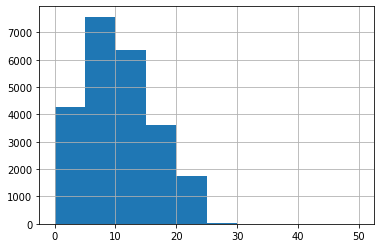

In [17]:
data['total_images'].hist()

В столбце с количеством фотографий аномалии отсуствуют.

##### Цена

763000000.0
12190.0


(0.0, 80000000.0)

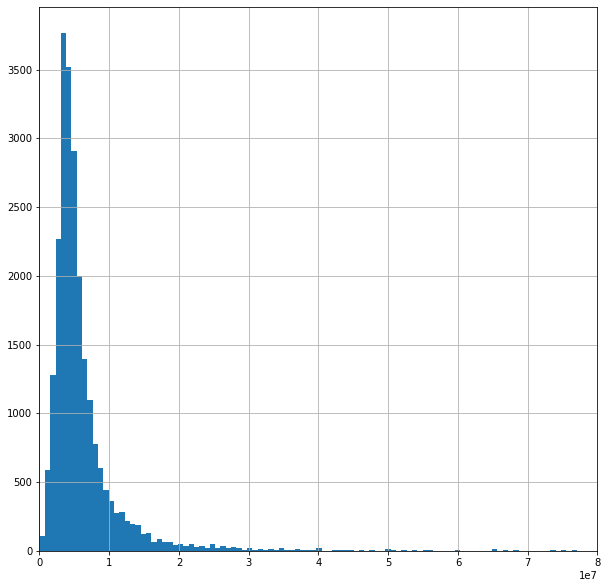

In [18]:
print(data['last_price'].max())
print(data['last_price'].min())
data['last_price'].hist(bins=1000, figsize=(10,10))
plt.xlim(0, 80000000)

Изучим эти же данные с помощью диаграммы размаха.

(-1000.0, 12000000.0)

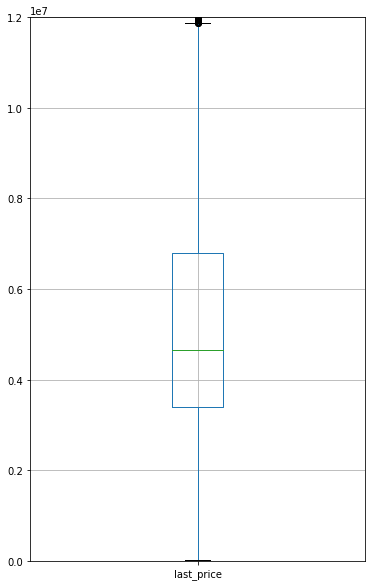

In [19]:
data.boxplot('last_price', figsize=(6, 10)) #Не слишком наглядно: видно, что есть большое
#количество выбросов, но сам график рассмотреть невозможно.

plt.ylim(-1000, 12000000)

Получается, что все цены, больше 11 млн. руб. считаются выбросами. Однако, опыт подсказывает, что цена на квартиру 12 190 руб. скорее всего ошибочна. С помощью метода describe()(см. ниже) можно увидеть, что первый квартиль - 3,4 млн.  На гистограмме можно заметить, что количество объявлений с аномально низкими ценами относительно не велико. Уберём из датафрейма аномально высокие цены, чтобы они не исказили результат анализа.

In [20]:
data['last_price'].describe()
data = data[(data['last_price']<11000000)&(data['last_price']>500000)].reset_index(drop=True)

##### Общая площадь

<AxesSubplot:>

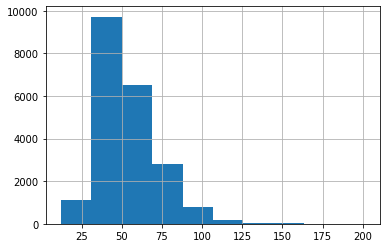

In [21]:
data['total_area'].hist()

В данном столбце аномалий не видно.

##### Дата размещения объявления

<AxesSubplot:>

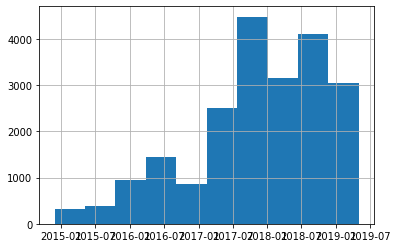

In [22]:
data['first_day_exposition'].hist()

Здесь также всё нормально.

##### Количество комнат

192

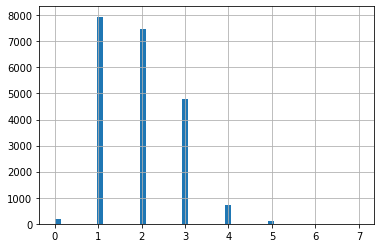

In [23]:
data['rooms'].hist(bins=50)
#узнаем, сколько квартир без комнат.
data['rooms'][data['rooms'] == 0].count()

In [24]:
#можно предположить, что 0 комнат указывали для квартир-студий. 
#Изучим информацию по общей площади для таких квартир.
print(data.groupby('rooms')['total_area'].mean())
#действительно, площадь у таких квартир мала. Заменим 0 на 1 в данном столбце
data.loc[data['rooms'] == 0, 'rooms'] = 1

rooms
0     27.182344
1     37.393548
2     54.189638
3     70.861017
4     84.177574
5    109.970642
6    120.445455
7    201.500000
Name: total_area, dtype: float64


##### Высота потолков

<AxesSubplot:>

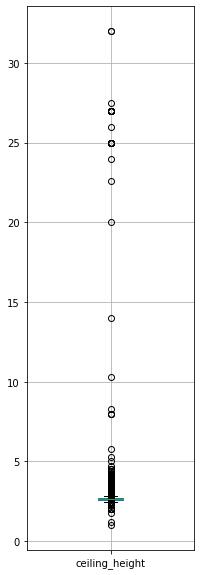

In [25]:
data.boxplot('ceiling_height', figsize=(3, 10))
#из диаграммы рассеивания видно, что есть выбросы. Квартиры с потолками выше 20 метров - точно ошибка.
#вероятно, была пропущена точка - разделитель в дробном значении. Избавимся от таких значений.

In [26]:
data.loc[(data['ceiling_height'] > 20), 'ceiling_height'] /= 10

count    21231.000000
mean         2.672945
std          0.247129
min          1.000000
25%          2.600000
50%          2.650000
75%          2.680000
max         20.000000
Name: ceiling_height, dtype: float64

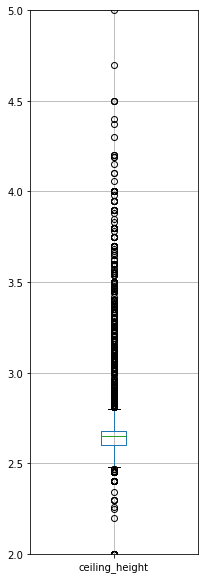

In [27]:
#предположим, что потолки меньше 2,5 и выше 4 метров не типичны для квартир. Изучим этот срез
data.boxplot('ceiling_height', figsize=(3, 10))
plt.ylim(2,5, 4)
data['ceiling_height'].describe()

In [28]:
#заменим высоту потолков в таких ячейках медианными значениями
data.loc[(data['ceiling_height']>4) | (data['ceiling_height']<2.5), 'ceiling_height']\
= data['ceiling_height'].median()
data['ceiling_height'].unique()

array([2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.7 , 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.61, 3.2 , 3.25, 3.45, 2.77, 2.64, 2.57, 2.73, 2.84,
       3.1 , 3.4 , 2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 2.52, 3.5 , 2.66,
       2.59, 2.85, 3.3 , 2.92, 3.13, 3.8 , 3.15, 3.62, 3.12, 2.53, 2.74,
       2.79, 2.95, 2.94, 3.7 , 2.83, 3.38, 3.01, 3.65, 2.71, 2.62, 3.57,
       2.82, 3.98, 2.63, 3.83, 2.88, 3.55, 3.95, 3.35, 4.  , 3.75, 3.36,
       3.68, 3.07, 3.37, 3.09, 3.16, 3.6 , 3.34, 2.81, 3.44, 2.68, 3.9 ,
       3.46, 3.27, 3.47, 3.33, 3.63, 3.14, 3.32, 3.18, 2.93, 2.86, 3.08,
       3.17, 3.11, 3.67, 3.28, 3.04, 3.26, 3.66, 3.23, 3.02, 3.21, 2.96,
       2.87, 3.54, 3.06, 3.39, 2.69, 3.22, 3.85, 3.42, 2.99, 2.97, 3.24,
       3.78, 3.31, 3.88, 3.56, 2.89, 3.48, 3.49, 3.59, 2.91])

##### Количество этажей в доме

In [29]:
data['floors_total'].unique()

array([11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 16, 18,  4,
       22, 10,  7, 13, 15,  2,  8, 28, 36, 21, 20, 35, 34, 60,  1, 29, 33,
       52, 37])

Здесь аномалий нет

##### Жилая площадь

count    21231.000000
mean        30.064596
std         12.954134
min          2.000000
25%         18.200000
50%         29.000000
75%         38.400000
max        112.000000
Name: living_area, dtype: float64

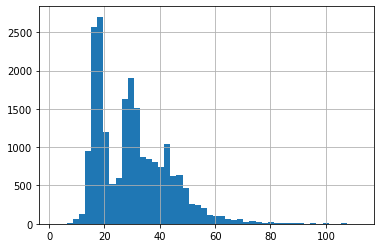

In [30]:
data['living_area'].hist(bins=50)
data['living_area'].describe()

In [31]:
data['living_area'].describe()

count    21231.000000
mean        30.064596
std         12.954134
min          2.000000
25%         18.200000
50%         29.000000
75%         38.400000
max        112.000000
Name: living_area, dtype: float64

Минимальная жилая площадь 2 метра это явно ошибка. Предположим, что минимальная жилая площадь - 15 м2. Вычислим медианное значение соотношения жилая площадь/общая площадь и с помощью этого показателя рассчитаем площадь в строках со слишком маленькой жилой площадью

In [32]:
data.loc[data['living_area'] < 15, 'living_area'] = data['total_area']*(data.loc[data['living_area']>15, 'living_area'].median()/data['total_area'].median())

##### Этаж

In [33]:
data['floor'].unique()

array([ 1,  4, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15,  9, 18,  8, 10, 19,
       16, 20, 27, 17, 14, 12, 28, 24, 21, 25, 23, 30, 29, 32, 33, 31])

В этом столбце аномалий нет

##### Апартаменты и свободная планировка

В этих столбцах указан булев тип данных, который мы проверить не можем.

##### Площадь кухни

count    21231.000000
mean         9.354768
std          3.733625
min          1.300000
25%          6.900000
50%          8.707067
75%         11.000000
max         64.000000
Name: kitchen_area, dtype: float64

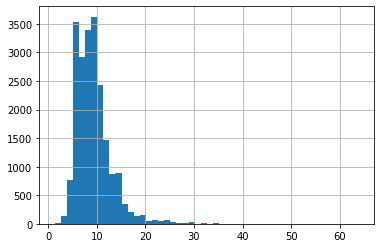

In [34]:
data['kitchen_area'].hist(bins=50)
data['kitchen_area'].describe()

In [35]:
#кухня меньше 2 кв.м. скорее всего ошибка.
#рассчитаем таким же способом, как и аномальную жилую площадь.
data.loc[data['kitchen_area'] < 5, 'kitchen_area']\
= data['total_area']*(data.loc[data['kitchen_area'] > 5, 'kitchen_area'].median()\
/data['total_area'].median())

##### Балконы

In [36]:
data['balcony'].unique()

array([2, 0, 1, 5, 4, 3])

Аномалий нет.

##### Название населенного пункта

Данные в этом столбце уже были обработаны.

##### Расстояние до аэропорта, до парка, до водоема и до центра

<AxesSubplot:>

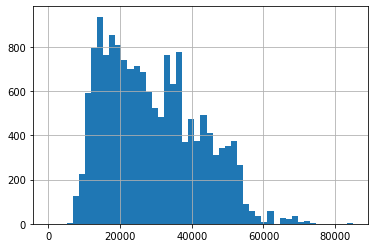

In [37]:
data['airports_nearest'].loc[data['airports_nearest'] != -1].hist(bins=50)
#построим гистограмму, предварительно убрав значение "-1", которым мы обозначили пропуск

Аномалий не видно.

<AxesSubplot:>

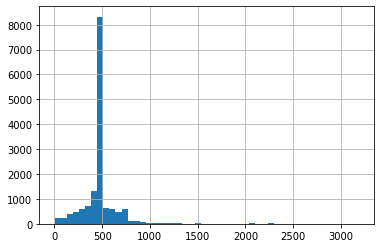

In [38]:
data['parks_nearest'].loc[data['parks_nearest'] != -1].hist(bins=50)

Есть выброс в районе 500. Вероятно, это может быть правдой.

<AxesSubplot:>

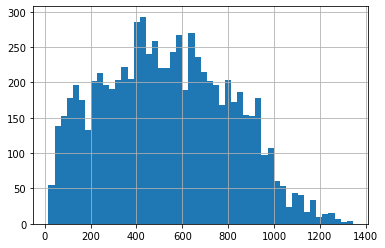

In [39]:
data['ponds_nearest'].loc[data['ponds_nearest'] != -1].hist(bins=50)

Аномалий не видно.

<AxesSubplot:>

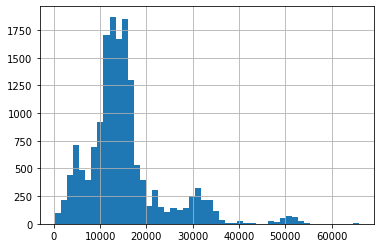

In [40]:
data['cityCenters_nearest'].loc[data['cityCenters_nearest'] != -1].hist(bins=50)

Также аномалий не видно.

##### Число водоёмов в радиусе 3 км

In [41]:
data['parks_around3000'].unique()

array([0, 1, 2, 3])

In [42]:
data['ponds_around3000'].unique()

array([0, 2, 1, 3])

Аномалий нет.

##### Сколько дней было размещено объявление

<AxesSubplot:>

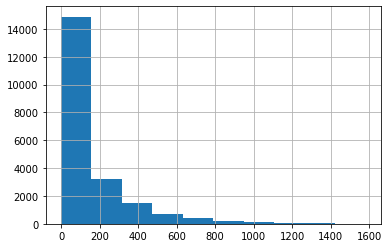

In [43]:
data['days_exposition'].hist()

Аномалий нет.

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра

In [44]:
data['price_per_meter'] = data['last_price']/data['total_area']

#### День недели, месяц и год публикации объявления

In [45]:
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

In [46]:
data['exposition_month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [47]:
data['exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

#### Тип этажа квартиры

In [48]:
def floor_type(row, ):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data[['floor', 'floors_total']].apply(floor_type, axis=1) 

#### Расстояние до центра города в километрах

In [49]:
data['cityCenter_km'] = (data['cityCenters_nearest']/1000).round()
data.loc[data['cityCenter_km'] == -0.0, 'cityCenter_km'] = -1

### Проведите исследовательский анализ данных

#### Изучение параметров объектов

##### Общая площадь

<AxesSubplot:>

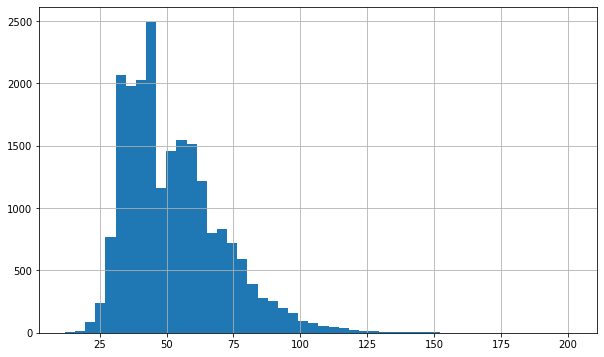

In [50]:
data['total_area'].hist(bins=50, figsize=(10,6))

В целом гистограмма выглядит как нормальное распределение с перекосом в сторону меньших площадей. Это может быть связано с тем, что покупательская способность у населения невысокая, в связи с чем более популярны квартиры маленькой площади. Еcть явный провал в районе площади квартир ок. 50 кв.м., а также есть выбросы в площадях 28-48 кв.м. Возможно это связано с особенностями застройки определенных районов в определенное время.

##### Жилая площадь

<AxesSubplot:>

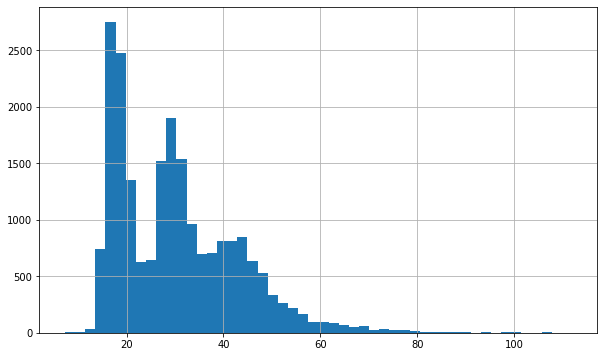

In [51]:
data['living_area'].hist(bins=50, figsize=(10,6))

В гистограмме по жилой площади виден очевидный провал в районе площадей 21-25 кв.м. Это также может быть связано с особенностями застройки, но это может быть и ошибка в данных.

##### Площадь кухни

<AxesSubplot:>

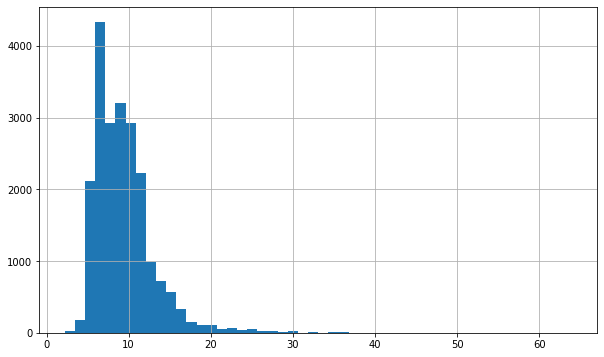

In [52]:
data['kitchen_area'].hist(bins=50, figsize=(10,6))

Площади кухонь также напоминают нормальное распределение с перекосом в сторону меньшей площади, но есть выброс в районе 6 кв. м.

##### Цена объекта

<AxesSubplot:>

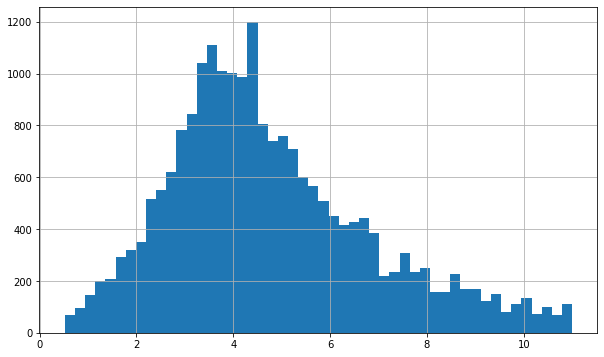

In [53]:
(data['last_price']/1000000).hist(bins=50, figsize=(10,6))

Гистограмма цены объекта очень близка к нормальному распределению. Диапазон наиболее частых цен купли-продажи - 2 млн. - 6 млн.

##### Количество комнат

<AxesSubplot:>

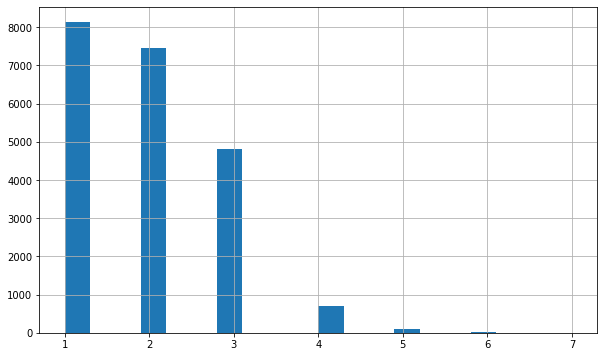

In [54]:
data['rooms'].hist(bins=20, figsize=(10,6))

Больше всего объявлений было соответственно на квартиры с 1, 2 и 3 комнатами. Гораздо меньше было объявлений на квартиры с 4, 5 и 6 комнатами.

##### Высота потолков

<AxesSubplot:>

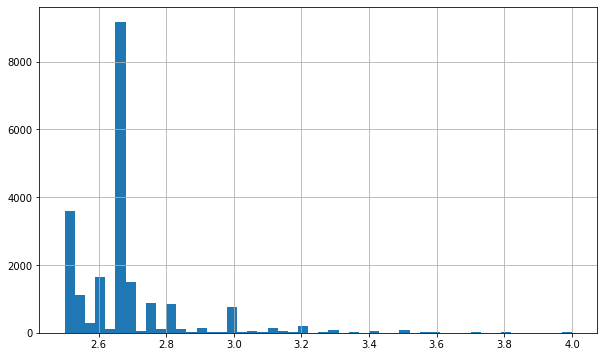

In [55]:
data['ceiling_height'].hist(bins=50, figsize=(10,6))

Распределение высот потолков неравномерное, что скорее всего связано с типовыми планами различных домов. Наиболее популярной высотой является высота между 2.6 и 2.8 м.

<AxesSubplot:>

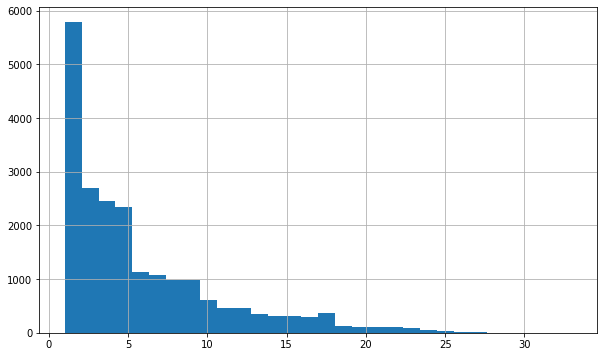

In [56]:
data['floor'].hist(bins=30, figsize=(10,6))

Наиболее популярны квартиры на нижних этажах (до пятого).

##### Тип этажа квартиры

<AxesSubplot:>

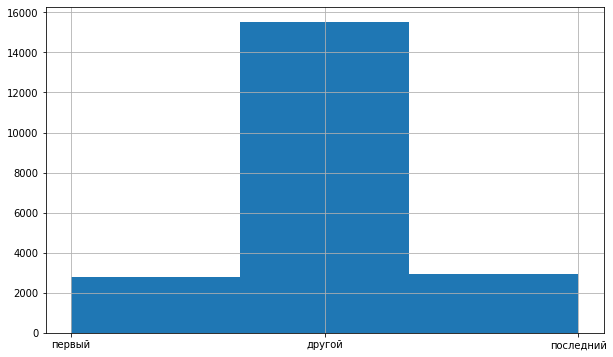

In [57]:
data['floor_type'].hist(bins=3, figsize=(10,6))

Квартир на первом и на последнем этажах примерно одинаковое количество. Заметно больше и первого, и второго этажей, квартир на других этажах.

##### Общее количество этажей в доме

<AxesSubplot:>

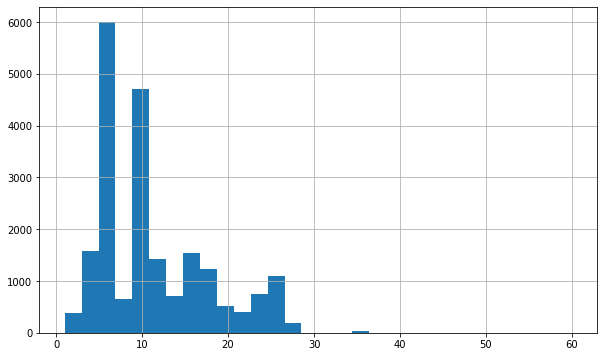

In [58]:
data['floors_total'].hist(bins=30, figsize=(10,6))

Явно преобладают пяти- и десятиэтажки.

##### Расстояние до центра

<AxesSubplot:>

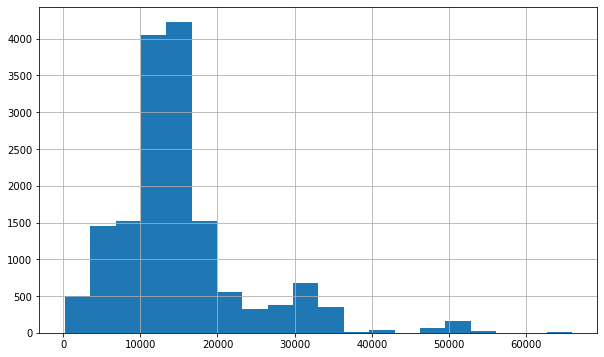

In [59]:
data['cityCenters_nearest'].loc[data['cityCenters_nearest'] != -1].hist(bins=20, figsize=(10,6))
#уберём из данных для гистограммы строки, где мы ставили заглушку "-1"

Самое часто встречающееся значение расстояния до центра города - от 10 км до 20 км.

##### Расстояние до ближайшего аэропорта

<AxesSubplot:>

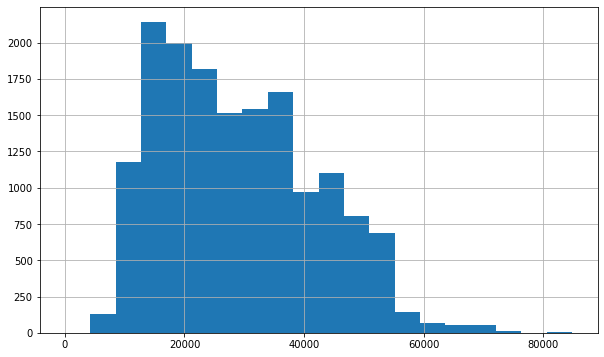

In [60]:
data['airports_nearest'].loc[data['airports_nearest'] != -1].hist(bins=20, figsize=(10,6))

Чаще всего до аэропорта придётся преодолеть от 10 до 40 км.

##### Расстояние до ближайшего парка

<AxesSubplot:>

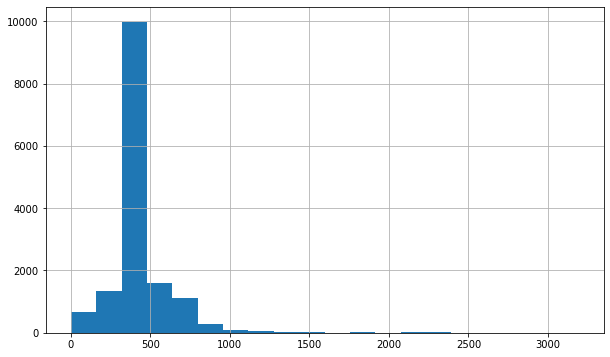

In [61]:
data['parks_nearest'].loc[data['parks_nearest'] != -1].hist(bins=20, figsize=(10,6))

Чаще всего ближайший парк находится не дальше 500 м.

##### День и месяц публикации объявления

<AxesSubplot:>

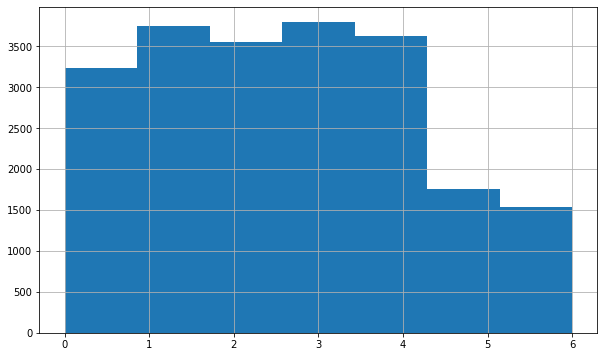

In [62]:
data['exposition_weekday'].hist(bins=7, figsize=(10,6))

В будние дни люди размещают объявления с примерно одинаковой частотой. Почти вполовину меньше объявлений размещается на выходных.

<AxesSubplot:>

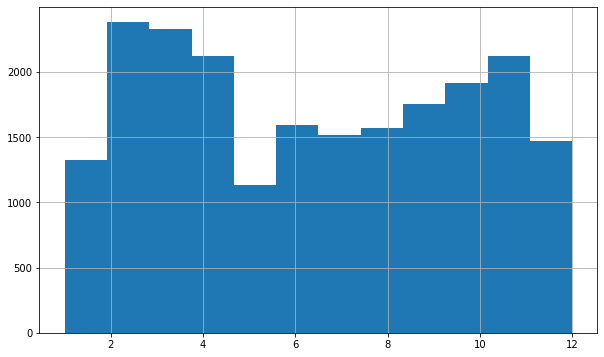

In [63]:
data['exposition_month'].hist(bins=12, figsize=(10,6))

Меньше всего объявлений размещают в те месяцы, когда в России праздники (январь, май, декабрь). Немного больше, чем в остальные месяцы, в феврале объявления размещают в феврале и ноябре.

#### Как быстро продавались квартиры

count    21231.000000
mean       151.160379
std        205.009551
min         -1.000000
25%         24.000000
50%         71.000000
75%        191.000000
max       1580.000000
Name: days_exposition, dtype: float64

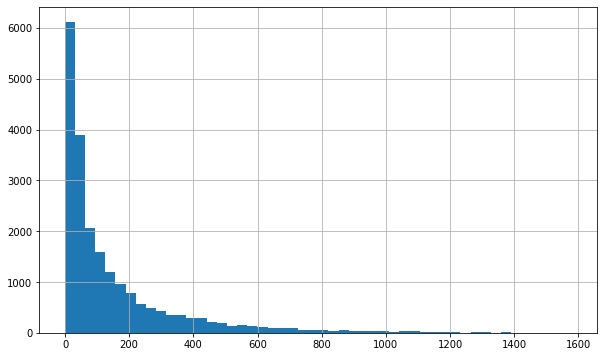

In [64]:
data['days_exposition'].hist(bins=50, figsize=(10,6))
data['days_exposition'].describe()

In [65]:
print('Среднее арифметическое значение =', data['days_exposition'].mean())
print('Медиана =', data['days_exposition'].median())

Среднее арифметическое значение = 151.16037869153595
Медиана = 71.0


Разница между медианой и средним очень большая. Это связано с аномальными значениями. На среднее повлияло большое количество коротких объявлений и даже небольшое количество очень длинных.

Наиболее показательной будет медиана. Чаще всего продажа квартиры занимает 91 день.

Быстрые продажи - это те, которые сильно отличаются от медианного значения. Например, в собранных даных есть данные о продажах за 1 день. Но в целом, можно считать, что продажи менее чем за 40 дней - быстрые.

Необычно долгие продажи. Как пример - объявление, которое было на сайтие 1580 дней - более 4 лет. Долгими продажами можно счиать те объявления, которые были размещены на сайте более 200 дней. Таких объявлений в выборке почти четверть.

<AxesSubplot:>

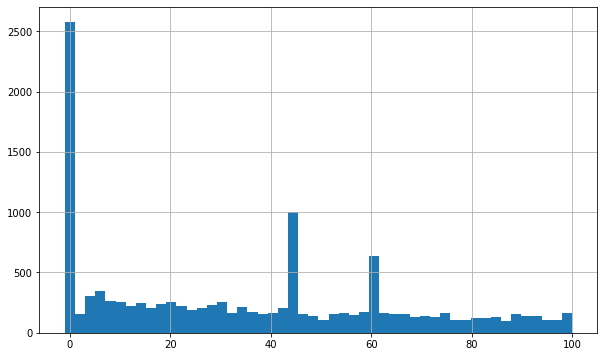

In [66]:
data['days_exposition'].loc[data['days_exposition'] <101].hist(bins=50, figsize=(10,6))

#### Факторы, в разной степени влияющие на общую (полную) стоимость объекта

Для определения, в какой степени тот или ной фактор влияет на стоимость квартиры, используем диаграмму рассеяния. Также рассчитаем коэффициенты корреляции.

##### Общая площадь

In [67]:
data['last_price'].corr(data['total_area'])

0.6828465284672102

Коэффициент корреляции говорит о том, что цена квартиры ощутимо зависит от общей площади. Построим график.

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

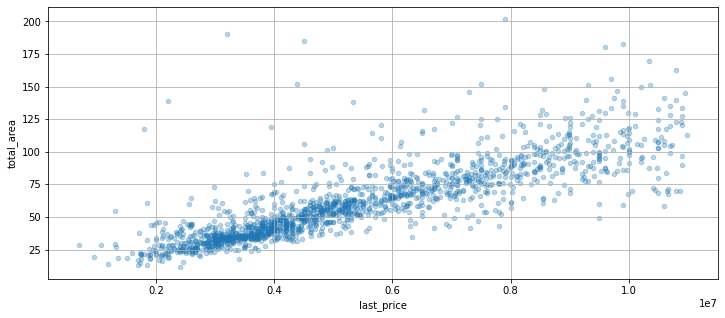

In [68]:
data.pivot_table(index='total_area', values='last_price', aggfunc='median')\
.reset_index().plot(x='last_price', y='total_area', kind='scatter',\
                    grid=True, figsize=(12, 5), alpha=0.3)

График также демонстрирует явную прямую зависимость цены квартиры от её площади.

##### Жилая площадь

In [69]:
data['last_price'].corr(data['living_area'])

0.5728065072914862

Зависимость цены от жилой площади меньше, но всё же она очевидна.

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

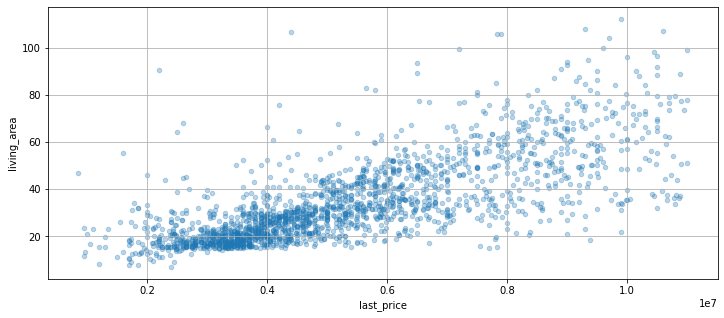

In [70]:
data.pivot_table(index='living_area', values='last_price', aggfunc='median')\
.reset_index().plot(x='last_price', y='living_area', kind='scatter',\
                    grid=True, figsize=(12, 5), alpha=0.3)

Зависимость не такая явная, но всё же она есть.

##### Площадь кухни

In [71]:
data['last_price'].corr(data['kitchen_area'])

0.48995631482589297

Зависимость цены от площади кухни еще меньше. Но она всё еще ощущается.

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

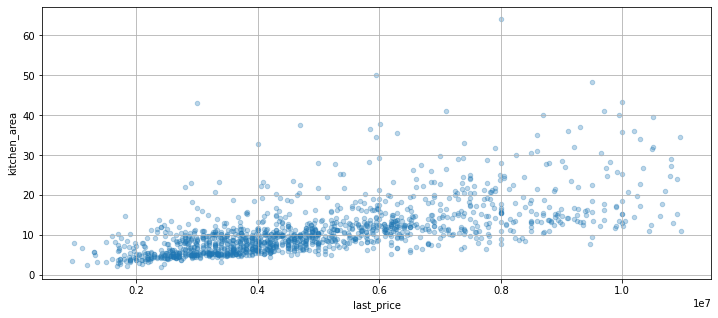

In [72]:
data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')\
.reset_index().plot(x='last_price', y='kitchen_area', kind='scatter',\
                    grid=True, figsize=(12, 5), alpha=0.3)

График это подтверждает.

##### Количество комнат

In [73]:
data['last_price'].corr(data['rooms'])

0.4415845139854019

Корреляция есть. Она не слишком велика, но она прослеживается.

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

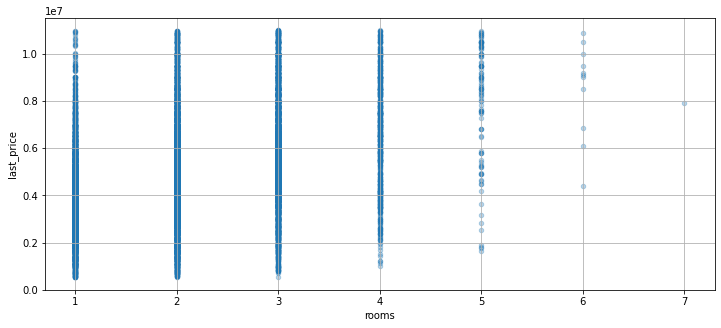

In [74]:
data.plot(x='rooms', y='last_price', kind='scatter',\
                    grid=True, figsize=(12, 5), alpha=0.3)

График это подтверждает: чем больше комнат, тем выше на графике сосредоточены точки. Однако данных по квартирам с 5, 6 7 комнатами недостаточно. Вероятно, поэтому и коэффициент корреляции такой не большой.

##### Этаж квартиры

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

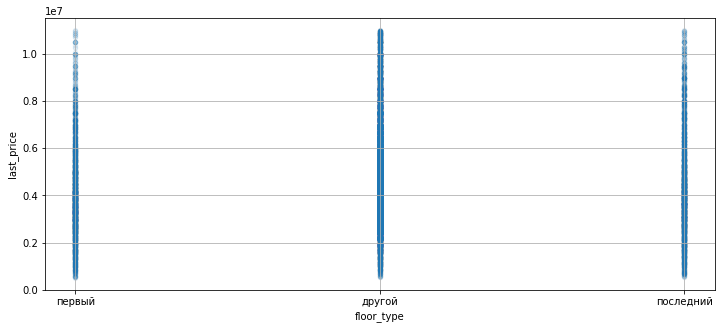

In [75]:
data.plot(x='floor_type', y='last_price', kind='scatter',\
                    grid=True, figsize=(12, 5), alpha=0.07)

Здесь корреляция не такая явная. Однако можно сказать, что дешёвых квартир на первом и на последнем этажах больше, чем дорогих. То есть, вероятно, факт нахождения квартиры на первом или последнем этажах снижает стоимость.

##### День недели размещения объявления

In [76]:
data['last_price'].corr(data['exposition_weekday'])

-0.01375409768970232

Судя по коэффициенту, можно сказать, что зависимость цены от дня недели размещения объявления, отсутсвует.

<AxesSubplot:xlabel='exposition_weekday', ylabel='last_price'>

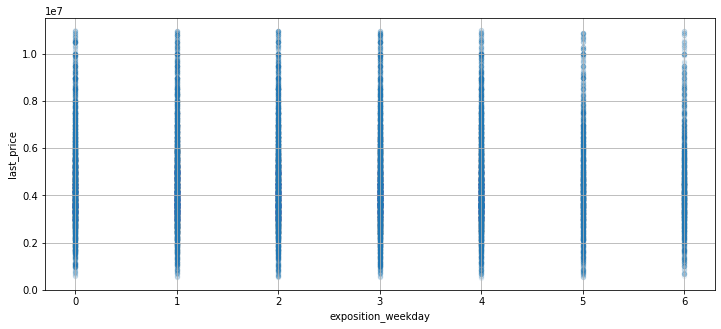

In [77]:
data.plot(x='exposition_weekday', y='last_price', kind='scatter',\
                    grid=True, figsize=(12, 5), alpha=0.07)

То же показывает и график.

##### Месяц размещения объявления

In [78]:
data['last_price'].corr(data['exposition_month'])

0.003434135778888242

Такая же ситуация с месяцем размещения.

<AxesSubplot:xlabel='exposition_month', ylabel='last_price'>

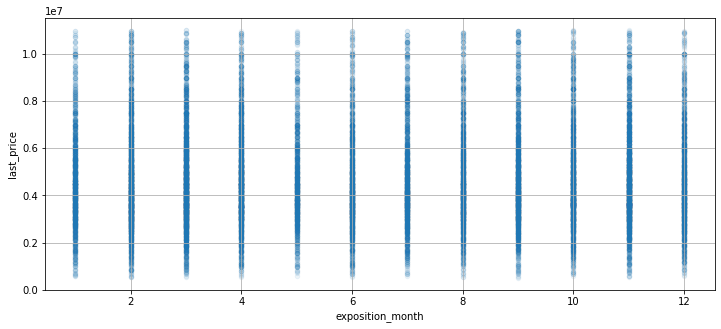

In [79]:
data.plot(x='exposition_month', y='last_price', kind='scatter',\
                    grid=True, figsize=(12, 5), alpha=0.07)

In [80]:
data['last_price'].corr(data['exposition_year'])

0.0032498844840110636

Год размещения объявления также не оказывает влияния на цену.

<AxesSubplot:xlabel='exposition_year', ylabel='last_price'>

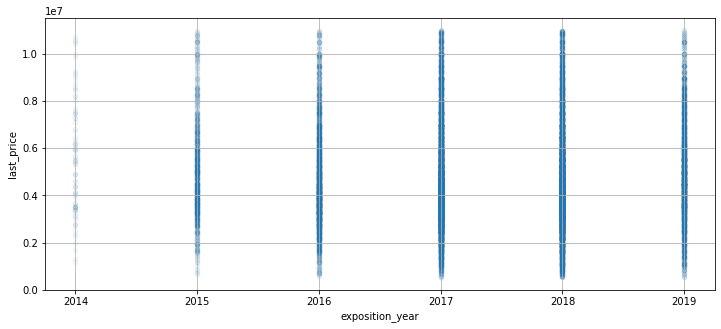

In [81]:
data.plot(x='exposition_year', y='last_price', kind='scatter',\
                    grid=True, figsize=(12, 5), alpha=0.05)

Из данного графика мы видим, что в представленных данных было мало объявлений за 14 и 15 годы. А также видно, что в 17 и 18 годах стало больше дешёвых и дорогих квартир.

**Этаж квартиры**

<AxesSubplot:xlabel='floor_type'>

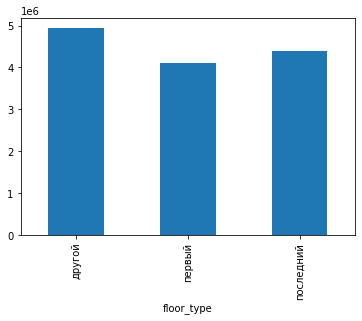

In [82]:
data.groupby('floor_type')['last_price'].mean().plot.bar()

Получается, что обычно самые дешевые квартиры - на первом этаже. Квартиры на последнем этаже продаются по более высокой цене, однако они уступают квартирам на этажах, отличных от первого и последнего.

**День размещения объявления**

<AxesSubplot:xlabel='exposition_weekday'>

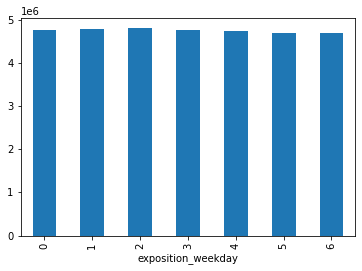

In [83]:
data.groupby('exposition_weekday')['last_price'].mean().plot.bar()

Разницы практически не видно, а значит, день недели, в который разместили объявление, не влияет на цену квартиры.

**Месяц размещения**

<AxesSubplot:xlabel='exposition_month'>

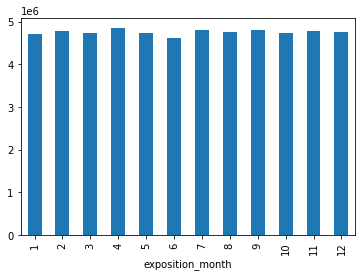

In [84]:
data.groupby('exposition_month')['last_price'].mean().plot.bar()

Здесь также нельзя сказать о сколь-нибудь ощутимом влиянии.

**Год размещения**

<AxesSubplot:xlabel='exposition_year'>

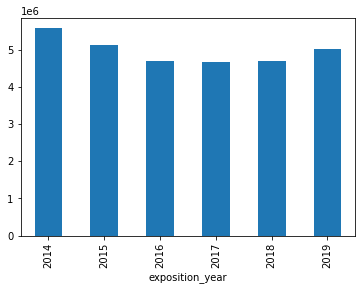

In [85]:
data.groupby('exposition_year')['last_price'].mean().plot.bar()

Можно сказать, что в 16, 17 и 18 годах цены были несколько ниже, чем в 14, 15 и 19 годах.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Конец исправлений
</div>

#### Средняя цена квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Определим 10 населенных пунктов с самым дорогим квадратным метром.

In [86]:
price_per_meter = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['mean', 'count']).sort_values(by=('count', 'price_per_meter'), ascending=False).reset_index()

price_per_meter.columns = ['locality_name', 'price_per_meter', 'total_offer']

price_per_meter.head(10)

,locality_name,price_per_meter,total_offer
0,Санкт-Петербург,104936.206915,13416
1,Мурино,86041.116064,586
2,Кудрово,95086.975249,468
3,Шушары,78551.344545,439
4,Всеволожск,67170.310382,396
5,Пушкин,100139.136513,337
6,Колпино,75185.478229,336
7,Парголово,90175.913458,327
8,Гатчина,68421.902770,305
9,Выборг,57932.878606,236


In [87]:
print('Самая высокая средняя цена квадратного метра равна:', price_per_meter['price_per_meter'].loc[0].round(), 'руб. Это цена в н.п.', price_per_meter['locality_name'].loc[0])
print('Самая низкая средняя цена квадратного метра равна:', price_per_meter['price_per_meter'].loc[9].round(), '. Это цена в н.п.', price_per_meter['locality_name'].loc[9])

Самая высокая средняя цена квадратного метра равна: 104936.0 руб. Это цена в н.п. Санкт-Петербург
Самая низкая средняя цена квадратного метра равна: 57933.0 . Это цена в н.п. Выборг


#### Расстояние до центра в Санкт-Петербурге

In [88]:
km_price = data.groupby('cityCenter_km')['price_per_meter'].mean().reset_index().drop([0])
km_price['price_of_km'] = km_price['price_per_meter']/km_price['cityCenter_km']
km_price.head()
#spb_km_to_center['cityCenter_km'].astype(int)

,cityCenter_km,price_per_meter,price_of_km
1,1.0,116996.814388,116996.814388
2,2.0,112387.158575,56193.579287
3,3.0,108997.894093,36332.631364
4,4.0,113093.512095,28273.378024
5,5.0,118946.950544,23789.390109


<AxesSubplot:xlabel='cityCenter_km'>

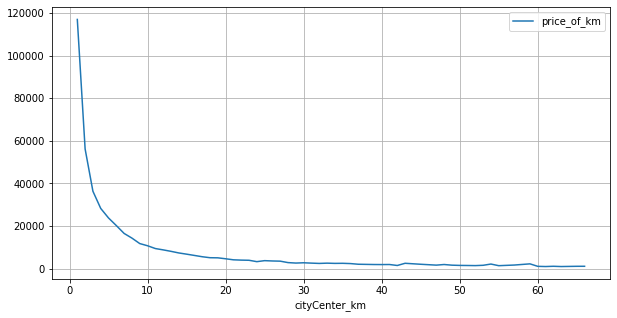

In [89]:
km_price.plot(x='cityCenter_km', y='price_of_km', grid=True, figsize=(10, 5))

На графике явно прослеживается обратная зависимость: чем меньше расстояние до центра, тем дороже квадратный метр. Причём зависимость наиболее явная при расстояниях от 0 до 10 км. Дальше расстояние влияет на цену уже гораздо слабее.

<AxesSubplot:>

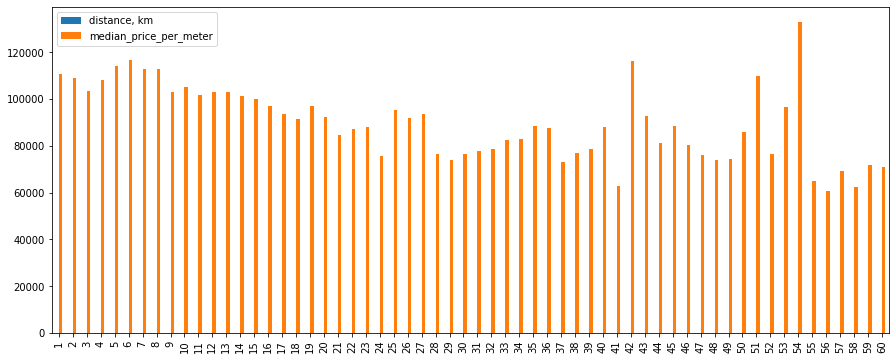

In [90]:
price_per_meter_km = data.pivot_table(index='cityCenter_km', values='price_per_meter', aggfunc='median').reset_index().drop([0])
price_per_meter_km.columns = ['distance, km', 'median_price_per_meter']
price_per_meter_km.plot.bar(figsize=(15,6))

Видно, что цены квадратного метра снижаются с удалением от центра города, однако есть ощутимые всплески: 42, 51, 54 км. Вероятно, в этих районах находятся ЖК с высокой стоимостью жилья.

### Общий вывод

При проведении анализа была проведена следующая работа:
1. Обработаны полученные данные (обработаны пропуски, аномальные значения и дублирующиеся данные);
2. Рассчитаны и добавлены дополнительные показатели для дальнейшего анализа: цена одного квадратного метра, день недели, месяц и год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах;
3. Изучены различные параметры объектов;
4. Изучены сроки продажи квартир;
5. Проанализированы факторы, влияющие на стоимость квартир, а также степень их влияния;
6. Найдены 10 самых дорогих и самые дешёвых, в плане стоимости квадратного метра, населенных пунктов;
7. Определено, влияет ли расстояние до центра Санкт-Петербурга на стоимость квадратного метра.


Изучение параметров объектов показало:
- Наиболее популярны квартиры с общей площадью от 25 до 75 кв. м., с жилой площадью от 10 до 40 кв. м. и площадью кухни от 5 до 15 кв.м. 
- Разброс цен квартир большой - от менее чем 1 млн. руб. до 11 млн. руб. Основная масса квартир однако входт в диапазон от 2 до 6 млн. руб.
- Спрос на квартиры обратно пропорционален количеству комнат: чаще всего покупают однокомнатные квартиры, чуть реже - двухкомнатные, еще немного реже - трёхкомнатные. Четырёх-, пяти- и шестикомнатные заметно менее популярны. 
- Больше всего объявлений было размещено на квартиры, расположенные на низких этажах - с первого по пятый.
- Самое часто встречающееся значение расстояния до центра города - от 10 км до 20 км. До аэропорта - от 10 до 40 км.
- До парка чаще всего не более 500 м.
- В будние дни люди размещают объявления с примерно одинаковой частотой. Почти вполовину меньше объявлений размещается на выходных.
- Меньше всего объявлений размещают в те месяцы, когда в России праздники (январь, май, декабрь). Немного больше, чем в остальные месяцы, в феврале объявления размещают в феврале и ноябре.


Сроки продажи квартиры
Чаще всего продажа квартиры занимает 91 день. Иногда квартиры продаются за 1 день, а иногда объявления висят на сайте более четырех лет. 


Факторы, влияющие на стоимость квартир
- Общая площадь и жилая площадь ощутимо влияют на цену квартиры. Площадь кухни чуть меньше, но всё же влияет. 
- Чем больше комнат - тем выше цена. Зависмость не слишком явнвя, но она прослеживается. Однако данных по квартирам с 5, 6 7 комнатами недостаточно. 
- Этаж, на котором расположена квартира, также влияет на её стоимость. Факт нахождения квартиры на первом или последнем этажах снижает стоимость. Квартиры на первом этаже немного дешевле квартир на последнем этаже.
- Дата размещения объявления не показала вляния на стоимость квартиры.

Самый дорогой квадратный метр оказался в Санкт-Петербурге: 103 820.0 руб.

Опредено, что чем меньше расстояние до центра Санкт-Петербурга, тем дороже квадратный метр, однако есть некоторые исключения.
